# 목표
**안전하면서도 실용성이 있는 비밀번호는 어떻게 하면 설정할 수 있을까?**
###### 뚫린 비밀번호들의 데이터셋을 분석해서 알아보자

#### 공격 종류
1. 무차별 대입공격
2. 사전 공격

# 해야 할 것
### 1. 양적 분석
   1) **조합 분석** => <only 숫자>, <only 영어>, <숫자+영어>, <숫자+영어+특수1개>, <숫자+영어+특수2개의 양> => 전체 비율에서 이 정도이더라. (완료)
      
      1-1) 대,소문자 포함여부 (완료)
      
   2) **길이 분석** =>  전체에서 비밀번호 길이별 뚫리는 비율. (완료)
   
   3) **길이 + 조합 분석** => 길이 8+숫자+영어+특수1개의 뚫린 비밀번호 비율 (완료)
      
### 2. 질적 분석
   1) **사용자 개인정보 포함**
   
       1-1) 이름 포함 여부 (완료)
       
       1-2) 생년월일 포함 여부
   
   2) **어떠한 특수문자가 잘 뚫리는지** (완료)
   
   3) **쿼티 키보드 가까운 문자 연속 입력 여부** (완료)
   
   4) **사전 단어 포함 여부 - 사전 공격 대비** (완료)
   
### 3. 빅데이터 전체파일로 돌려보기

### 4. 키보드 히트맵 시각화하기

In [113]:
from dask.diagnostics import ProgressBar

# ProgressBar 등록 이거
progressBar = ProgressBar()
progressBar.register()

# 나머지 코드는 이전 예제와 동일

In [114]:
progressBar.unregister()

In [115]:
import pandas as pd
import dask
import dask.array as da
import dask.dataframe as dd

# 대용량의 csv 파일을 dataframe으로 바로 불러오기.
data = dd.read_csv("/kaggle/input/breached-passwords/breachcompilation.txt")
data

,lfc
npartitions=150,
,string
,...
...,...
,...
,...


# 텍스트 데이터 전처리

In [116]:
import dask.bag as db

# 텍스트 파일을 Dask Bag로 읽기
bag = db.read_text("/kaggle/input/breached-passwords/breachcompilation.txt")

# 처음 100개 요소 추출
first_100_tuples = bag.take(1000)

# 튜플의 각 요소를 문자열로 변환하는 함수
def tuple_to_string(tpl):
    return ''.join(tpl).replace('\n', '')

# map() 함수를 사용하여 각 튜플을 문자열로 변환하고 새로운 Bag에 저장
first_100_strings = db.from_sequence(first_100_tuples).map(tuple_to_string)

# 결과를 리스트로 변환
first_100_list = first_100_strings.compute()

# 리스트를 다른 형식으로 저장하거나 처리할 수 있습니다.
print(first_100_list[:100])

[########################################] | 100% Completed | 406.64 ms
[########################################] | 100% Completed | 711.61 ms
['lfc', 'LFL870206', '123abc', '123abc@', 'teh-cnt', 'sweet1', 'hfrtnxbr', '25bush', '5172980a', 'north33', '1terry', '11moneys', '34babie', 'edward59', 'teamochapa', '24a.24a', '44--------44', '1234567890', '000---11', '8688851a', '1100a', '8688851', '8688851A', '8688851a', '8688851A', '8688851a', '123rrr', 'С…СЂРёСЃС‚СЏ', 'христя', 'qwerty12345', 'kbvgjgj', '1234567890', '8077asd', 'cfvjqkjdrf105', '9833895102', 'brantner1', '123rrr', 'asdcxz', ' ', '13111984', 'gjgjdddd', '3969453474', '10261994', '10261994пв', '10261994пїЅпїЅ', '10261994', 'qweasd', 'nshmotherlode', '261193', 'qwerty123', 'nikoz581', '0303k.:', '123art00sim', '1234567890', 'afeni1mom', 'grilled2', '123409sava', '1q2w3e', '000rtye', '987654321', '81336201v', '012345678', 'liqian', '2951815', '2950000', 'family', 'michaella', 'sridhar441', '3505', 'aoibhinn', 'michaella', 'pe

In [117]:
# Bag의 요소를 Pandas DataFrame으로 변환합니다
pandas_df = pd.DataFrame(first_100_list, columns=['password'])

# Pandas DataFrame을 Dask DataFrame으로 변환합니다
df = dd.from_pandas(pandas_df, npartitions=10)  # npartitions는 파티션 수를 지정합니다
df

,password
npartitions=10,
0,string
100,...
...,...
900,...
999,...


In [118]:
df.head(50)

[########################################] | 100% Completed | 106.66 ms


,password
0,lfc
1,LFL870206
2,123abc
3,123abc@
4,teh-cnt
5,sweet1
6,hfrtnxbr
7,25bush
8,5172980a
9,north33


# 특징 추출

In [119]:
df['length'] = df['password'].apply(lambda x: len(x), meta=('x', 'int'))
df.head()

[########################################] | 100% Completed | 102.74 ms


,password,length
0,lfc,3
1,LFL870206,9
2,123abc,6
3,123abc@,7
4,teh-cnt,7


In [120]:
# 숫자로만 이루어진 비밀번호 개수 체크하기
df['is_numeric'] = df['password'].apply(lambda x: x.isdigit(), meta=('x', 'bool'))

df.head()

[########################################] | 100% Completed | 102.32 ms


,password,length,is_numeric
0,lfc,3,False
1,LFL870206,9,False
2,123abc,6,False
3,123abc@,7,False
4,teh-cnt,7,False


In [121]:
# 문자로만 이루어진 비밀번호 개수 체크
df['is_alphabetic'] = df['password'].apply(lambda x: x.isalpha(), meta=('x', 'bool'))

df.head()

[########################################] | 100% Completed | 103.40 ms


,password,length,is_numeric,is_alphabetic
0,lfc,3,False,True
1,LFL870206,9,False,False
2,123abc,6,False,False
3,123abc@,7,False,False
4,teh-cnt,7,False,False


In [122]:
# 특수문자 포함 여부 체크
import re
pattern = re.compile(r'[^a-zA-Z0-9]')
df['has_special_char_regex'] = df['password'].apply(lambda x: bool(pattern.search(x)), meta=('x', 'bool'))
df.head()

[########################################] | 100% Completed | 104.96 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex
0,lfc,3,False,True,False
1,LFL870206,9,False,False,False
2,123abc,6,False,False,False
3,123abc@,7,False,False,True
4,teh-cnt,7,False,False,True


In [123]:
# 특수문자 개수 체크
import string

# Function to count the number of special characters in a password
def count_special_characters(password):
    special_characters = set(string.punctuation)
    return sum(1 for char in password if char in special_characters)

# Create a new column 'special_char_count' with the count of special characters
df['special_char_count'] = df['password'].apply(count_special_characters, meta=('x', 'int'))

# Display the DataFrame with the new 'special_char_count' column
# print(df[['password', 'special_char_count']])
df.head()

[########################################] | 100% Completed | 101.94 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count
0,lfc,3,False,True,False,0
1,LFL870206,9,False,False,False,0
2,123abc,6,False,False,False,0
3,123abc@,7,False,False,True,1
4,teh-cnt,7,False,False,True,1


In [124]:
# Function to extract unique special characters from a password and return as a string
def extract_special_characters_as_string(password):
    special_chars = ''.join(set(re.findall(r'[^a-zA-Z0-9]', password)))
    return special_chars

# Create a new column 'all_special_chars' with the string of unique special characters
df['all_special_chars'] = df['password'].apply(extract_special_characters_as_string, meta=('x', 'str'))

# Display the DataFrame with the new 'all_special_chars' column
# print(df[['password', 'all_special_chars']])
df.head()

[########################################] | 100% Completed | 103.51 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars
0,lfc,3,False,True,False,0,
1,LFL870206,9,False,False,False,0,
2,123abc,6,False,False,False,0,
3,123abc@,7,False,False,True,1,@
4,teh-cnt,7,False,False,True,1,-


In [125]:
# 특수문자 반복타입, 직선 타입 체크
def identify_pattern(password):
    # Check for repeat pattern (e.g., "aaabbb" or "112233")
    repeat_pattern = re.search(r'(.)\1\1', password) is not None

    # Check for straight pattern on QWERTY keyboard (e.g., "123456" or "asdfgh")
    straight_pattern_alpha = re.search(r'(abc|bcd|cde|def|efg|fgh|ghi|hij|ijk|jkl|klm|lmn|mno|nop|opq|pqr|qrs|rst|stu|tuv|uvw|vwx|wxy|xyz)', password.lower()) is not None
    straight_pattern_numeric = re.search(r'(012|123|234|345|456|567|678|789)', password) is not None

    if repeat_pattern:
        return 'repeat'
    elif straight_pattern_alpha or straight_pattern_numeric:
        return 'straight'
    else:
        return 'other'

# Create a new column 'pattern_type' based on the identified pattern
df['pattern_type'] = df['password'].apply(identify_pattern, meta=('x', 'object'))

df.head()

[########################################] | 100% Completed | 102.36 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars,pattern_type
0,lfc,3,False,True,False,0,,other
1,LFL870206,9,False,False,False,0,,other
2,123abc,6,False,False,False,0,,straight
3,123abc@,7,False,False,True,1,@,straight
4,teh-cnt,7,False,False,True,1,-,other


In [126]:
import string

# 키보드에서 입력가능한 특수문자인지 체크
# Function to check if a special character is typeable on a qwerty keyboard
def is_typeable_special_char(char):
    qwerty_special_chars = set(string.ascii_letters + string.digits + string.punctuation + ' ')
    return char in qwerty_special_chars

# Function to filter out rows with non-typeable special characters in the 'all_special_chars' column
def filter_rows_with_typeable_special_chars(row):
    return all(is_typeable_special_char(char) for char in row['all_special_chars'])

# Apply the filtering function to the DataFrame
df = df[df.apply(filter_rows_with_typeable_special_chars, axis=1, meta=('x', 'object'))]

# Show the filtered DataFrame
# print(df_filtered.compute())  # If you want to see the result, use compute() to trigger computation

df

,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars,pattern_type
npartitions=10,,,,,,,,
0,string,int64,bool,bool,bool,int64,string,string
100,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
900,...,...,...,...,...,...,...,...
999,...,...,...,...,...,...,...,...


In [127]:
# 영어 대소문자 모두 들어있는지 체크
# Function to check if the password contains both uppercase and lowercase letters
def has_both_upper_and_lower(password):
    return any(c.islower() for c in password) and any(c.isupper() for c in password)

# Create a new column 'has_both_upper_and_lower' with True if the password meets the condition
df['has_both_upper_and_lower'] = df['password'].apply(has_both_upper_and_lower, meta=('x', 'bool'))

df.head()

[########################################] | 100% Completed | 102.73 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars,pattern_type,has_both_upper_and_lower
0,lfc,3,False,True,False,0,,other,False
1,LFL870206,9,False,False,False,0,,other,False
2,123abc,6,False,False,False,0,,straight,False
3,123abc@,7,False,False,True,1,@,straight,False
4,teh-cnt,7,False,False,True,1,-,other,False


In [128]:
import nltk
from nltk.corpus import words

# NLTK에서 영어 단어 사전 다운로드
nltk.download('words')

# 영어 단어 목록 가져오기
english_words = set(words.words())

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [129]:
# 각 비밀번호에 영어 단어가 포함되어 있는지 여부 확인
def has_english_word(password):
    # 특수 문자를 공백으로 대체하여 단어 추출
    password = re.sub(r'[^a-zA-Z0-9]', ' ', password)
    # 각 단어가 영어 단어 목록에 있는지 확인
    return any(word.lower() in english_words for word in password.split())

df['has_english_word'] = df['password'].apply(has_english_word, meta=('x', 'bool'))

# 결과 확인
selected_columns = ['password', 'has_english_word']
selected_df = df[selected_columns]

# has_english_word True인 것만 결과 확인
# has_english_word_df = df[df["has_english_word"]]
has_english_word_df = selected_df[selected_df["has_english_word"]]

# 결과 확인
has_english_word_df.compute()

# has_english_word_df = has_english_word_df[~has_english_word_df["is_alphabetic"]].compute()

[########################################] | 100% Completed | 210.50 ms


,password,has_english_word
65,family,True
75,monster,True
79,slipknot,True
82,slipknot,True
85,computer,True
...,...,...
958,k.u.r.t,True
969,koala_1995,True
972,kotikova_n_m,True
975,kotopes_o,True


In [130]:
import nltk

# NLTK에서 'names' 말뭉치 다운로드
nltk.download('names')

# 'names' 말뭉치에서 남성 이름과 여성 이름 가져오기
male_names = nltk.corpus.names.words('male.txt')
female_names = nltk.corpus.names.words('female.txt')

# 결과 출력 (예시로 각 성별에서 처음 10개 이름만 출력)
print("Male Names:", male_names[:10])
print("Female Names:", female_names[:10])

[nltk_data] Downloading package names to /usr/share/nltk_data...
[nltk_data]   Package names is already up-to-date!
Male Names: ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']
Female Names: ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [131]:
# 영어 이름 합치기
male_names = set(male_names)
female_names = set(female_names)
all_names = male_names.union(female_names)

# 각 비밀번호에 영어 이름이 포함되어 있는지 여부 확인
def has_english_name(password):
    # 특수 문자를 공백으로 대체하여 단어 추출
    password = re.sub(r'[^a-zA-Z0-9]', ' ', password)
    # 각 단어가 영어 이름 목록에 있는지 확인
    return any(word.lower() in all_names for word in password.split())

# DataFrame에 새로운 열 추가
df['has_english_name'] = df['password'].apply(has_english_name, meta=('x', 'bool'))

selected_columns = ['password', 'has_english_name']
selected_df = df[selected_columns]

# has_english_name True인 것만 결과 확인
has_english_name_df = selected_df[selected_df["has_english_name"]]

# 결과 확인
has_english_name_df.compute()
# selected_df.compute()

[########################################] | 100% Completed | 216.85 ms


,password,has_english_name


[########################################] | 100% Completed | 103.29 ms
[########################################] | 100% Completed | 102.74 ms
[########################################] | 100% Completed | 102.98 ms
[########################################] | 100% Completed | 101.90 ms
[########################################] | 100% Completed | 103.11 ms
[########################################] | 100% Completed | 102.97 ms
[########################################] | 100% Completed | 102.06 ms
[########################################] | 100% Completed | 104.71 ms
[########################################] | 100% Completed | 102.16 ms
[########################################] | 100% Completed | 103.34 ms


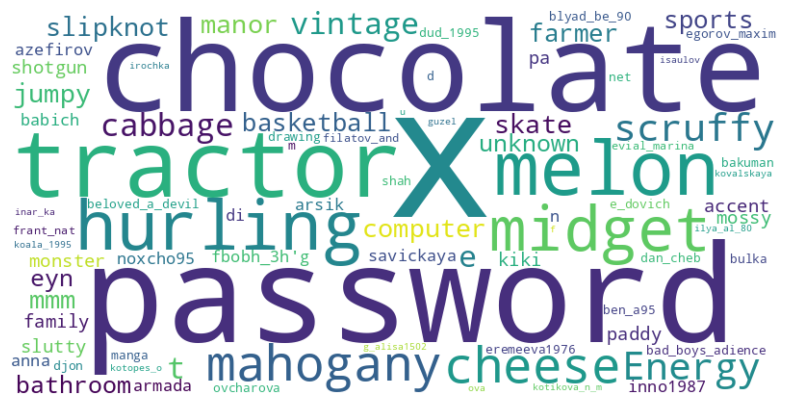

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

text_data = ' '.join(has_english_word_df['password'])

mask_image_path = '/kaggle/input/key-image/free-icon-key-7611581.png'
mask_image = np.array(Image.open(mask_image_path))

icon = Image.open(mask_image_path)    # 마스크가 될 이미지 불러오기 
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
#     mask=mask,
#     contour_width=10,
#     contour_color='black',
    prefer_horizontal = True
).generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# EDA (탐색적 데이터 분석)
시각적 및 통계적인 방법으로 데이터를 탐색

변수 간의 관계를 확인하고, 패턴이나 특이점을 발견

데이터의 분포, 중심 경향성, 편차 등을 통계적으로 분석

필요에 따라 가설 검정이나 신뢰 구간 등을 활용하여 통계적인 의사결정


In [133]:
# 계산 방법 : value_counts(), sum() bool 값인 경우 sum을 하면 개수를 구할 수 있다.

only_number = df["is_numeric"].sum().compute()
print('숫자로만 이루어진 데이터 개수 :', only_number)

only_alphabet = df["is_alphabetic"].sum().compute()
print('문자로만 이루어진 데이터 개수 :', only_alphabet)

# True인 것만, 필요한 행만 추출해서 데이터셋 보기
numeric_df = df[["password", "is_numeric"]].loc[df["is_numeric"]].compute() # 이 형식을 기억하자
alphabet_df = df[["password", "is_alphabetic"]].loc[df["is_alphabetic"]].compute()

display(numeric_df, alphabet_df) # 2개 동시 출력

[########################################] | 100% Completed | 209.48 ms
숫자로만 이루어진 데이터 개수 : 131
[########################################] | 100% Completed | 322.00 ms
문자로만 이루어진 데이터 개수 : 372
[########################################] | 100% Completed | 314.35 ms
[########################################] | 100% Completed | 314.48 ms


,password,is_numeric
17,1234567890,True
21,8688851,True
31,1234567890,True
34,9833895102,True
39,13111984,True
...,...,...
686,679956,True
687,6917123,True
694,89140041205,True
695,89217657066,True


,password,is_alphabetic
0,lfc,True
6,hfrtnxbr,True
14,teamochapa,True
30,kbvgjgj,True
37,asdcxz,True
...,...,...
986,kovalha,True
989,kovrnatasha,True
992,ksushapanda,True
997,kubnik,True


In [134]:
has_special_char_regex = df["has_special_char_regex"].sum().compute()
print('특수문자 포함 데이터 개수 :', has_special_char_regex)

# 특수문자 데이터셋으로 추출
has_special_char_regex_df = df[["password", "length", "has_special_char_regex", "special_char_count", "all_special_chars"]].loc[df["has_special_char_regex"]]

display(has_special_char_regex_df.compute())


# 모든 문자가 숫자, 영어, 특수문자를 포함하는지 여부 계산하는 함수
def check_contains_all(value):
    has_digit = any(char.isdigit() for char in value)
    has_alpha = any(char.isalpha() for char in value)
    has_special = any(char.isalnum() == False and char.isspace() == False for char in value)
    return has_digit and has_alpha and has_special

# 모두 포함 새로운 열 추가
has_special_char_regex_df['contains_all'] = has_special_char_regex_df['password'].apply(check_contains_all, meta=('x', 'bool'))

contains_all_df = has_special_char_regex_df.loc[has_special_char_regex_df["contains_all"]]
contains_all = contains_all_df["contains_all"].sum().compute()

print('숫자, 영어, 특수문자 모두 포함:', contains_all)
display(contains_all_df.compute())


contains_all_length8_df = contains_all_df.loc[contains_all_df["length"] > 8]
print('수,영,특 모두 포함에 길이 8 이상:', contains_all_length8_df.shape[0].compute())
display(contains_all_length8_df.compute())

contains_all_1 = contains_all_df.loc[contains_all_df['special_char_count'] == 1]
print('모두 포함 중 특수문자 1개 포함:', contains_all_1.shape[0].compute())
display(contains_all_1.compute())

contains_all_2 = contains_all_df.loc[contains_all_df['special_char_count'] == 2]
print('모두 포함 중 특수문자 2개 포함:', contains_all_2.shape[0].compute())
display(contains_all_2.compute())

contains_all_3 = contains_all_df.loc[contains_all_df['special_char_count'] > 3]
print('모두 포함 중 특수문자 3개 이상 포함:', contains_all_3.shape[0].compute())
display(contains_all_3.compute())

[########################################] | 100% Completed | 328.50 ms
특수문자 포함 데이터 개수 : 171
[########################################] | 100% Completed | 344.47 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars
3,123abc@,7,True,1,@
4,teh-cnt,7,True,1,-
15,24a.24a,7,True,1,.
16,44--------44,12,True,8,-
18,000---11,8,True,3,-
...,...,...,...,...,...
979,kotovas-70,10,True,1,-
982,kotya_bagdan,12,True,1,_
988,kovalskaya-t,12,True,1,-
991,krick.bk,8,True,1,.


[########################################] | 100% Completed | 313.96 ms
숫자, 영어, 특수문자 모두 포함: 65
[########################################] | 100% Completed | 424.15 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars,contains_all
3,123abc@,7,True,1,@,True
15,24a.24a,7,True,1,.,True
51,0303k.:,7,True,2,:.,True
615,fbobh_3h'g,10,True,2,_',True
640,cinnamonaltoids_99,18,True,1,_,True
...,...,...,...,...,...,...
971,korostelev_3333,15,True,1,_,True
976,kotova.69,9,True,1,.,True
977,kotova_74,9,True,1,_,True
979,kotovas-70,10,True,1,-,True


[########################################] | 100% Completed | 825.64 ms
수,영,특 모두 포함에 길이 8 이상: 55
[########################################] | 100% Completed | 315.26 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars,contains_all
615,fbobh_3h'g,10,True,2,_',True
640,cinnamonaltoids_99,18,True,1,_,True
642,cinnamonaltoids_99,18,True,1,_,True
643,st545_252525,12,True,1,_,True
693,79621601378.kirill,18,True,1,.,True
705,albina-1945,11,True,1,-,True
706,aleks-270379,12,True,1,-,True
707,aleksandr.ustinov.2012,22,True,2,.,True
708,aleksej.shorin.86,17,True,2,.,True
710,alena_plotnikova_1995,21,True,2,_,True


[########################################] | 100% Completed | 725.22 ms
모두 포함 중 특수문자 1개 포함: 45
[########################################] | 100% Completed | 312.40 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars,contains_all
3,123abc@,7,True,1,@,True
15,24a.24a,7,True,1,.,True
640,cinnamonaltoids_99,18,True,1,_,True
642,cinnamonaltoids_99,18,True,1,_,True
643,st545_252525,12,True,1,_,True
693,79621601378.kirill,18,True,1,.,True
705,albina-1945,11,True,1,-,True
706,aleks-270379,12,True,1,-,True
712,alexrv_06,9,True,1,_,True
715,alija-gatina0,13,True,1,-,True


[########################################] | 100% Completed | 725.24 ms
모두 포함 중 특수문자 2개 포함: 20
[########################################] | 100% Completed | 330.85 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars,contains_all
51,0303k.:,7,True,2,:.,True
615,fbobh_3h'g,10,True,2,_',True
707,aleksandr.ustinov.2012,22,True,2,.,True
708,aleksej.shorin.86,17,True,2,.,True
710,alena_plotnikova_1995,21,True,2,_,True
722,andrey-1983_08,14,True,2,_-,True
724,andreyka.gorshkov.98,20,True,2,.,True
725,andreyka.zhilin.1981,20,True,2,.,True
728,anna.savickaya.1986,19,True,2,.,True
742,arina-sharapova-80,18,True,2,-,True


[########################################] | 100% Completed | 716.19 ms
모두 포함 중 특수문자 3개 이상 포함: 0
[########################################] | 100% Completed | 322.65 ms


,password,length,has_special_char_regex,special_char_count,all_special_chars,contains_all


In [135]:
a = df['all_special_chars'].compute()
a

[########################################] | 100% Completed | 219.35 ms


0       
1       
2       
3      @
4      -
      ..
995     
996     
997     
998     
999     
Name: all_special_chars, Length: 990, dtype: string

In [136]:
# 패턴 타입별 개수
pattern_type = df["pattern_type"].value_counts().compute()
pattern_type

[########################################] | 100% Completed | 317.19 ms


pattern_type
other       890
straight     54
repeat       46
Name: count, dtype: int64[pyarrow]

In [137]:
has_both_upper_and_lower = df["has_both_upper_and_lower"].sum().compute()
print('대소문자 포함 데이터 개수 :', has_both_upper_and_lower)

# True인 것만, 필요한 행만 추출해서 데이터셋 보기
has_both_upper_and_lower_df = df[["password", "has_both_upper_and_lower"]].loc[df["has_both_upper_and_lower"]].compute()

has_both_upper_and_lower_df

[########################################] | 100% Completed | 324.71 ms
대소문자 포함 데이터 개수 : 17
[########################################] | 100% Completed | 317.53 ms


,password,has_both_upper_and_lower
128,Saphira,True
145,Mexican1993,True
287,Mexican1993,True
291,Energy,True
464,Energy,True
506,Password,True
541,iWU8bG1k9uvxgm,True
584,RainbowTech1,True
586,Password1,True
627,dLBBpMNu,True


# 시각화

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
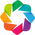

In [138]:
# HoloViews에 bokeh를 백엔드 시각화 엔진으로 설정
import datashader as ds
import datashader.transfer_functions as tf
import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import datashade
from collections import Counter
hv.extension('bokeh')

In [139]:
# Calculate the frequency of each word length
length_counts = df['length'].value_counts()

# Convert Dask Series to Pandas for plotting
length_counts = length_counts.compute()
sorted_length_counts = length_counts.sort_index() # 정렬을 해줘야 되더라.

length_curve = hv.Curve(sorted_length_counts).opts(
    xlabel='비밀번호 길이',
    ylabel='Frequency',
    width=600,
    height=400,
    color='blue',
    tools=['hover'],
    line_width=3,         # 선 두께
    show_grid=True,
    title='비밀번호 길이'
)

display(length_curve)

#데이터 쉐이더 사용 방식
# Use Datashader to rasterize the curve for better performance with large datasets
shaded_curve = datashade(length_curve, line_width=2, cmap=['blue']).opts(
    width=600,    # 원하는 너비 설정
    height=400,   # 원하는 높이 설정
    tools=['hover'],
    show_grid=True,
    title='비밀번호 길이',
    xlabel='길이',
    ylabel='개수'
)

shaded_curve

[########################################] | 100% Completed | 319.21 ms


:Curve   [length]   (count)

:DynamicMap   []
   :RGB   [length,count]   (R,G,B,A)

In [140]:
# 대용량 아마 불가능!! 히스토그램은 안만들어도 됨
# "length" 열 선택
length_data = df['length']

# dask array로 변환
length_array = length_data.to_dask_array()

# dask array 내장 함수를 통한 히스토그램 계산
# x축 0~20, 막대 수 20개.
histogram, edges = da.histogram(length_array, bins=20, range=(0, 20))

# HoloViews를 사용하여 히스토그램 시각화
# 그저 HoloViews를 사용하니 데이터 크기 때문인지, 시각화 오류가 발생. da.histogram 사용하니 오류 없이 히스토그램 생성 완료.
histogram_plot = hv.Histogram((edges, histogram), kdims=['비밀번호 길이'], vdims=['개수']).opts(
        width=600, height=400,
        color='blue',
        tools=['hover'],
        show_grid=True,
        title='비밀번호 길이'
    )

# 시각화
histogram_plot

[########################################] | 100% Completed | 316.22 ms
[########################################] | 100% Completed | 314.85 ms
[########################################] | 100% Completed | 220.08 ms
[########################################] | 100% Completed | 317.91 ms


:Histogram   [비밀번호 길이]   (개수)

In [163]:
df

,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars,pattern_type,has_both_upper_and_lower,has_english_word,has_english_name,safety
npartitions=10,,,,,,,,,,,,
0,string,int64,bool,bool,bool,int64,string,string,bool,bool,bool,string
100,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
900,...,...,...,...,...,...,...,...,...,...,...,...
999,...,...,...,...,...,...,...,...,...,...,...,...


In [172]:
length_stats = df['length'].describe().compute()
display(length_stats)

length_stats = df['special_char_count'].value_counts().compute()
display(length_stats)

result = df.groupby('special_char_count')['length'].agg(['mean', 'std']).compute().sort_index()
display(result)

result = df.groupby('safety')['length'].agg(['mean', 'std', 'min', 'max']).compute().sort_index()
display(result)

print("영어 포함")
result = df.groupby('safety')['has_english_word'].value_counts().compute().sort_index()
display(result)

result = df.groupby('safety')['has_both_upper_and_lower'].value_counts().compute().sort_index()
display(result)

result = df.groupby('safety')['pattern_type'].value_counts().compute().sort_index()
display(result)

[########################################] | 100% Completed | 338.91 ms


count    990.000000
mean       9.406061
std        4.291545
min        1.000000
25%        8.000000
50%        9.000000
75%       13.000000
max       32.000000
Name: length, dtype: float64

[########################################] | 100% Completed | 322.44 ms


special_char_count
0    822
1    122
2     38
3      4
4      3
8      1
Name: count, dtype: int64

[########################################] | 100% Completed | 319.91 ms


,mean,std
special_char_count,,
0,8.855231,4.125878
1,11.737705,3.723509
2,13.289474,5.093228
3,11.250000,4.349329
4,13.000000,0.000000
8,12.000000,NaN


[########################################] | 100% Completed | 414.99 ms


,mean,std,min,max
safety,,,,
middle,10.333333,1.367131,9,17
strong,14.787611,2.941244,11,22
weak,8.600000,4.027803,1,32


영어 포함
[########################################] | 100% Completed | 445.27 ms


safety  has_english_word
middle  False                50
        True                  7
strong  False                91
        True                 22
weak    False               741
        True                 79
Name: count, dtype: int64

[########################################] | 100% Completed | 416.07 ms


safety  has_both_upper_and_lower
middle  False                        57
strong  False                       112
        True                          1
weak    False                       804
        True                         16
Name: count, dtype: int64

[########################################] | 100% Completed | 421.45 ms


safety  pattern_type
middle  other            57
strong  other           107
        repeat            5
        straight          1
weak    other           726
        repeat           41
        straight         53
Name: count, dtype: int64

In [141]:
# Calculate the frequency of each word length
spec_counts = df['special_char_count'].value_counts()

# Convert Dask Series to Pandas for plotting
spec_counts = spec_counts.compute()

bars = hv.Bars(spec_counts).opts(
    xlabel='특수문자',
    ylabel='개수',
    title='특수문자 수',
    show_grid=True,
    width=600,  # 그래프의 가로 크기
    height=400  # 그래프의 세로 크기
).opts(
    opts.Bars(color='orange')  # 바 차트의 색상 지정
)

display(bars)

# Holoviews 선 그래프 생성
curve = hv.Curve(spec_counts).opts(
    xlabel='특수문자 수',
    ylabel='개수',
    title='특수문자 수',
    show_grid=True,
    width=600,  # 그래프의 가로 크기
    height=400,  # 그래프의 세로 크기
    color='blue'  # 선 그래프의 색상 지정
)

display(curve)


#데이터 쉐이더 사용 방식
# Use Datashader to rasterize the curve for better performance with large datasets
shaded_curve = datashade(curve, line_width=2, cmap=['orange']).opts(
    width=600,    # 원하는 너비 설정
    height=400,   # 원하는 높이 설정
    tools=['hover'],
    show_grid=True,
    title='비밀번호 길이',
    xlabel='길이',
    ylabel='개수'
)

shaded_curve

[########################################] | 100% Completed | 329.96 ms


:Bars   [special_char_count]   (count)

:Curve   [special_char_count]   (count)

:DynamicMap   []
   :RGB   [special_char_count,count]   (R,G,B,A)

In [142]:
# Assuming your dataset is stored in a DataFrame named 'df'
# Assuming the column name is 'special_characters'
# Adjust the column name if it's different in your dataset

# Flatten the list of special characters
all_special_characters = [char for str in df['all_special_chars'] for char in str]

# Count the occurrences of each special character
special_char_counts = Counter(all_special_characters)

# Convert the counts to a DataFrame for easier plotting
df_counts = pd.DataFrame(list(special_char_counts.items()), columns=['Special Character', 'Count'])

# Sort the DataFrame by counts for better visualization
df_counts = df_counts.sort_values(by='Count', ascending=False)

# Convert DataFrame to Holoviews Dataset
hv_dataset = hv.Dataset(df_counts)

# Create a bar chart using Holoviews
bar_chart = hv.Bars(hv_dataset, 'Special Character', 'Count').opts(
    width=800,
    height=400,
    color='blue',
    xlabel='특수 문자',
    ylabel='개수',
    title='각 특수문자 수'
)

# Show the plot
bar_chart

[########################################] | 100% Completed | 103.56 ms
[########################################] | 100% Completed | 102.44 ms
[########################################] | 100% Completed | 102.42 ms
[########################################] | 100% Completed | 102.43 ms
[########################################] | 100% Completed | 101.95 ms
[########################################] | 100% Completed | 102.95 ms
[########################################] | 100% Completed | 103.19 ms
[########################################] | 100% Completed | 103.04 ms
[########################################] | 100% Completed | 102.83 ms
[########################################] | 100% Completed | 103.34 ms


:Bars   [Special Character]   (Count)

In [143]:
import dask.dataframe as dd
import holoviews as hv
from holoviews import opts

# 여러 열에 대해 True 값만 선택한 후 바 차트 생성
selected_columns = df.select_dtypes(include='bool').columns

true_sums = {}

for column in selected_columns:
    true_sum = df[column].sum().compute()
    true_sums[column] = true_sum

# 여러 열의 총합을 가지고 하나의 바 차트 생성
bar_chart = hv.Bars(true_sums, '칼럼명', '개수')

# 바 차트 스타일 및 레이아웃 설정
bar_chart.opts(
    opts.Bars(width=800, height=500, tools=['hover'], xlabel='종류', ylabel='개수', title='특징')
)

[########################################] | 100% Completed | 210.31 ms
[########################################] | 100% Completed | 322.58 ms
[########################################] | 100% Completed | 324.30 ms
[########################################] | 100% Completed | 237.81 ms
[########################################] | 100% Completed | 221.09 ms
[########################################] | 100% Completed | 320.26 ms


:Bars   [칼럼명]   (개수)

In [ ]:
# # 11자리 영어 숫자 특수 1
# df
# strong
# 숫자로만 이면 19개


# 영어로만이면 13자리

# 특수문자 1개 포함이면 11자리

# middle
# 숫자 18
# 영어 12자리
# 특수 10자리


In [144]:
# 조건에 따라 "safety" 칼럼 생성
def set_safety(row):
    if row['is_numeric'] and row['length'] >= 19:
        return 'strong'
    elif row['is_alphabetic'] and row['length'] >= 13:
        return 'strong'
    elif row['special_char_count'] >= 1 and row['length'] >= 11:
        return 'strong'
    elif row['is_numeric'] and row['length'] >= 17:
        return 'middle'
    elif row['is_alphabetic'] and row['length'] >= 11:
        return 'middle'
    elif row['special_char_count'] >= 1 and row['length'] >= 9:
        return 'middle'
    else:
        return 'weak'

df['safety'] = df.apply(set_safety, axis=1, meta=('x', 'string'))

# 결과 확인
# df.compute()

strong_rows = df[df['safety'] == 'strong']
strong_rows.compute()

[########################################] | 100% Completed | 344.47 ms


,password,length,is_numeric,is_alphabetic,has_special_char_regex,special_char_count,all_special_chars,pattern_type,has_both_upper_and_lower,has_english_word,has_english_name,safety
16,44--------44,12,False,False,True,8,-,repeat,False,False,False,strong
47,nshmotherlode,13,False,True,False,0,,other,False,False,False,strong
131,mmm...chocolate,15,False,False,True,3,.,repeat,False,True,False,strong
135,x-x-melon-x-x,13,False,False,True,4,-,other,False,True,False,strong
138,mmm...chocolate,15,False,False,True,3,.,repeat,False,True,False,strong
...,...,...,...,...,...,...,...,...,...,...,...,...
972,kotikova_n_m,12,False,False,True,2,_,other,False,True,False,strong
980,kotovichvalentina,17,False,True,False,0,,other,False,False,False,strong
982,kotya_bagdan,12,False,False,True,1,_,other,False,False,False,strong
988,kovalskaya-t,12,False,False,True,1,-,other,False,True,False,strong


[########################################] | 100% Completed | 329.22 ms
[########################################] | 100% Completed | 355.78 ms


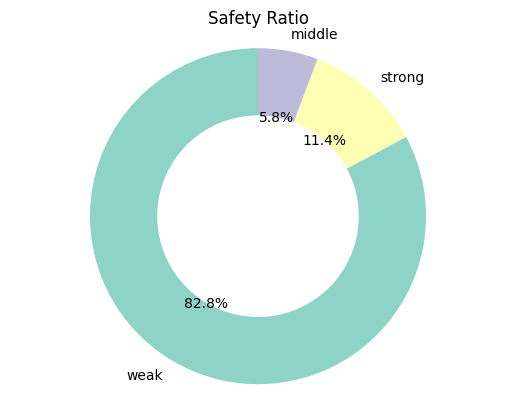

In [145]:
# 'safety' 열의 범주별 비율 계산
safety_counts = df['safety'].value_counts().compute()
total_samples = len(df)
safety_ratio = safety_counts / total_samples


# Matplotlib로 도넛 차트 시각화
labels = safety_ratio.index
sizes = safety_ratio.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.Set3.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 시각화 출력
plt.title("Safety Ratio")
plt.show()

[########################################] | 100% Completed | 314.37 ms
[########################################] | 100% Completed | 326.53 ms


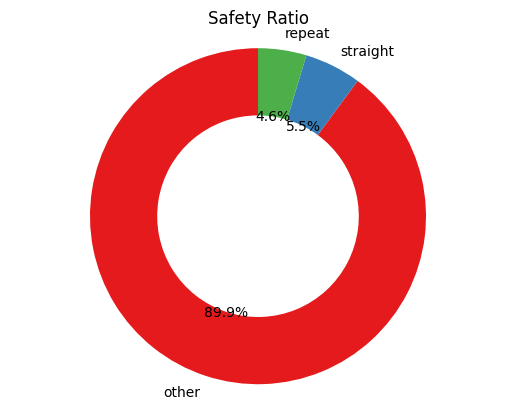

In [146]:
# 'safety' 열의 범주별 비율 계산
safety_counts = df['pattern_type'].value_counts().compute()
total_samples = len(df)
safety_ratio = safety_counts / total_samples


# Matplotlib로 도넛 차트 시각화
labels = safety_ratio.index
sizes = safety_ratio.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.Set1.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 시각화 출력
plt.title("Safety Ratio")
plt.show()

[########################################] | 100% Completed | 313.90 ms
[########################################] | 100% Completed | 315.12 ms


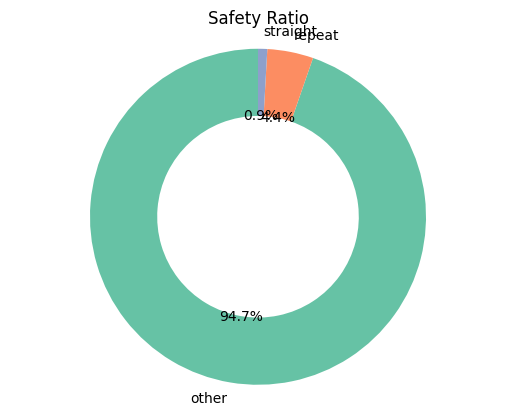

In [147]:

# 강한 비밀번호에서만 계싼
safety_counts = strong_rows['pattern_type'].value_counts().compute()
total_samples = len(strong_rows)
safety_ratio = safety_counts / total_samples


# Matplotlib로 도넛 차트 시각화
labels = safety_ratio.index
sizes = safety_ratio.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.Set2.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 시각화 출력
plt.title("Safety Ratio")
plt.show()

In [148]:
# strong에서 분석

# Flatten the list of special characters
all_special_characters = [char for str in strong_rows['all_special_chars'] for char in str]
print(all_special_characters)
# Count the occurrences of each special character
special_char_counts = Counter(all_special_characters)

# Convert the counts to a DataFrame for easier plotting
df_counts = pd.DataFrame(list(special_char_counts.items()), columns=['Special Character', 'Count'])

# Sort the DataFrame by counts for better visualization
df_counts = df_counts.sort_values(by='Count', ascending=False)

# Convert DataFrame to Holoviews Dataset
hv_dataset = hv.Dataset(df_counts)

# Create a bar chart using Holoviews
bar_chart = hv.Bars(hv_dataset, 'Special Character', 'Count').opts(
    width=800,
    height=400,
    color='blue',
    xlabel='특수 문자',
    ylabel='개수',
    title='각 특수문자 수'
)

# Show the plot
bar_chart

[########################################] | 100% Completed | 102.59 ms
[########################################] | 100% Completed | 103.71 ms
[########################################] | 100% Completed | 102.10 ms
[########################################] | 100% Completed | 102.75 ms
[########################################] | 100% Completed | 102.62 ms
[########################################] | 100% Completed | 103.25 ms
[########################################] | 100% Completed | 103.16 ms
[########################################] | 100% Completed | 103.78 ms
[########################################] | 100% Completed | 103.29 ms
[########################################] | 100% Completed | 103.05 ms
['-', '.', '-', '.', '-', '-', '_', '_', '_', '.', '.', '_', '.', '-', '-', '.', '.', '_', '-', '.', '_', '_', '-', '.', '.', '.', '.', '.', '_', '.', '_', '-', '-', '_', '-', '-', '.', '.', '_', '_', '.', '.', '_', '_', '.', '_', '_', '-', '.', '_', '-', '.', '-', '.', '.', '.',

:Bars   [Special Character]   (Count)

In [149]:
# strong 비밀번호에서만 적용

# 여러 열에 대해 True 값만 선택한 후 바 차트 생성
selected_columns = strong_rows.select_dtypes(include='bool').columns
# selected_columns = strong_rows.select_dtypes(include=['bool', 'int']).columns


true_sums = {}

for column in selected_columns:
    true_sum = strong_rows[column].sum().compute()
    true_sums[column] = true_sum

# 여러 열의 총합을 가지고 하나의 바 차트 생성
bar_chart = hv.Bars(true_sums, '칼럼명', '개수')

# 바 차트 스타일 및 레이아웃 설정
bar_chart.opts(
    opts.Bars(width=800, height=500, tools=['hover'], xlabel='종류', ylabel='개수', title='특징')
)

[########################################] | 100% Completed | 319.21 ms
[########################################] | 100% Completed | 318.93 ms
[########################################] | 100% Completed | 347.43 ms
[########################################] | 100% Completed | 316.47 ms
[########################################] | 100% Completed | 319.21 ms
[########################################] | 100% Completed | 316.25 ms


:Bars   [칼럼명]   (개수)

####### 레거시 주석
* 숫자로만 이루어진 비밀번호의 개수 - 사실상 가장 뚫리기 쉬운 거니까 패스
* 특수문자 포함 비밀번호의 개수 - 특수문자가 포함되면 유출성이 줄어드는가?
* 특수문자의 포함개수별 유출 정도 - 특수문자가 1개면 2개면 3개면
* 각 특수문자의 종류별 개수 어떤 특수문자를 조심하면 좋은지, 
* 비밀번호의 길이별 유출 정도 = 5인 비밀번호의 개수 / 전체 비밀번호 개수

In [ ]:
!pip show holoviews datashader

In [ ]:
import datashader as ds
import pandas as pd
import numpy as np

# 데이터 생성
data = pd.DataFrame({'value': np.random.randint(0, 100, size=10000)})

# datashader Canvas 객체 생성
canvas = ds.Canvas(plot_width=400, plot_height=300)

# 데이터 집계
agg = canvas.points(data, 'index', 'value')

# 집계 결과를 이미지로 변환
img = ds.transfer_functions.shade(agg, cmap=['lightblue', 'darkblue'], how='log')

# 이미지 출력
img

In [ ]:
# !pip install tapmap
!pip install kbhmap

In [ ]:
import os
s = 'kbhmap -i /kaggle/input/test12/test1.txt -o /kaggle/input/key-image/free-icon-key-7611581.png'
# os.system('kbhmap -i test.txt -o heatmap_test.png')
os.system(s)
#컴퓨터에서 하면 될 수도..